<center><span style="color: #b967ff; font-family: cursive; font-size: 28px;" >1. Import useful libraries 📚</span><center/>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
print('imported succesfully!')

imported succesfully!


----------------------

<center><span style="color: #b967ff; font-family: cursive; font-size: 28px;" >2. Import the files 🧩</span><center/>

In [3]:
source_path = r'C:\Users\user\Desktop\Digikala Task\tasks'
files_list = ['customers.pickle', 'orders.pickle', 'products.pickle', 'transactions.pickle']
dataframes = {}
for file in files_list:
    file_name = file.split('.')[0]
    df = pd.read_pickle(source_path + '/' + file)
    dataframes[file_name] = df

In [4]:
customers = dataframes['customers']
orders = dataframes['orders']
products = dataframes['products']
transactions = dataframes['transactions']

-------------------

<center><span style="color: #b967ff; font-family: cursive; font-size: 28px;" >3. Data Cleaning 🧹</span><center/>

<center><span style="color: #ff71ce; font-family: cursive; font-size: 28px;" > 3.1. Customers </span></center>

In [5]:
customers.head()

,customer_id,customer_name,customer_email,signup_date
0,1,Customer 1,customer1@example.com,2020-01-01 00:00:00.000000000
1,2,Customer 2,customer2@example.com,2020-01-01 17:32:15.135135135
2,3,Customer 3,customer3@example.com,2020-01-02 11:04:30.270270270
3,4,Customer 4,customer4@example.com,2020-01-03 04:36:45.405405405
4,5,Customer 5,customer5@example.com,2020-01-03 22:09:00.540540540


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     1000 non-null   int32         
 1   customer_name   1000 non-null   object        
 2   customer_email  1000 non-null   object        
 3   signup_date     1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 27.5+ KB


In [7]:
customers.isnull().sum()

customer_id       0
customer_name     0
customer_email    0
signup_date       0
dtype: int64

In [8]:
customers.duplicated().sum()

0

<center><span style="color: #ff71ce; font-family: cursive; font-size: 28px;" > 3.2. Orders </span></center>

In [9]:
orders.head()

,order_id,customer_id,order_date
0,1,685,2021-11-20
1,2,560,2020-07-10
2,3,630,2022-06-03
3,4,193,2021-09-07
4,5,836,2021-10-11


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     5000 non-null   int32         
 1   customer_id  5000 non-null   int32         
 2   order_date   5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(2)
memory usage: 78.3 KB


In [11]:
orders.isnull().sum()

order_id       0
customer_id    0
order_date     0
dtype: int64

In [12]:
orders.duplicated().sum()

0

<center><span style="color: #ff71ce; font-family: cursive; font-size: 28px;" > 3.3. Products </span></center>

In [13]:
products.head()

,product_id,product_name,product_price
0,1,Product 1,55
1,2,Product 2,58
2,3,Product 3,74
3,4,Product 4,81
4,5,Product 5,47


In [14]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     100 non-null    int32 
 1   product_name   100 non-null    object
 2   product_price  100 non-null    int32 
dtypes: int32(2), object(1)
memory usage: 1.7+ KB


In [15]:
products.isnull().sum()

product_id       0
product_name     0
product_price    0
dtype: int64

In [16]:
products.duplicated().sum()

0

<center><span style="color: #ff71ce; font-family: cursive; font-size: 28px;" > 3.4. Transactions </span></center>

In [17]:
transactions.head()

,transaction_id,order_id,product_id,transaction_quantity
0,1,3028,24,95
1,2,4384,70,83
2,3,1991,49,59
3,4,1382,38,99
4,5,4894,13,44


In [18]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   transaction_id        10000 non-null  int32
 1   order_id              10000 non-null  int32
 2   product_id            10000 non-null  int32
 3   transaction_quantity  10000 non-null  int32
dtypes: int32(4)
memory usage: 156.4 KB


In [19]:
transactions.isnull().sum()

transaction_id          0
order_id                0
product_id              0
transaction_quantity    0
dtype: int64

In [20]:
transactions.duplicated().sum()

0

<div class="alert alert-block alert-info" style="font-size:20px;"> 📌 I knew there is no missing value.I just brought this heatmap to share a tool for checking missing values:</div>

<Axes: >

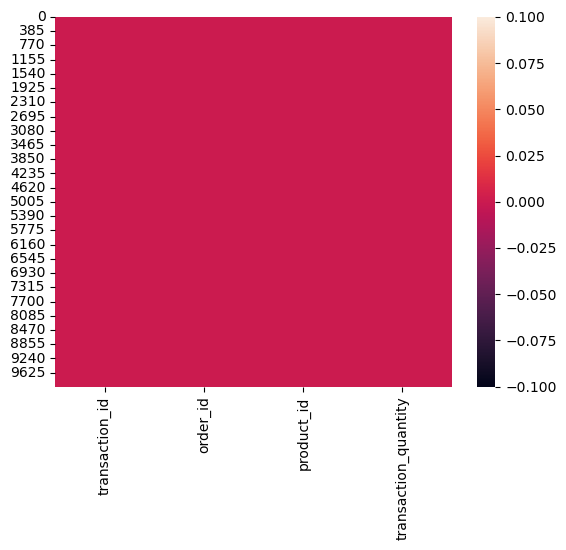

In [21]:
sns.heatmap(transactions.isnull())

<div class="alert alert-block alert-info" style="font-size:20px;"> 📌 I knew that there was no need to data cleaning, but I wanted to be sure that there was no error on my analysis.</div>

------------------------------

<center><span style="color: #b967ff; font-family: cursive; font-size: 28px;" >4. Basic Insights 🐰</span><center/>

<span style="color: #ff71ce; font-size:20px;"> Total number of Customers: <span>

In [22]:
print(f'The total number of customers is: {len(customers.customer_id)}')

The total number of customers is: 1000


 <span style="color: #ff71ce; font-size:20px;"> Total number of Orders:  <span>

In [23]:
print(f'The total number of orders is: {len(orders.order_id)}')

The total number of orders is: 5000


<span style="color: #ff71ce;font-size:20px;"> Total number of products: <span>

In [24]:
print(f'The total number of products is: {len(products.product_id)}')

The total number of products is: 100


<span style="color: #ff71ce;font-size:20px;"> Total number of Transactions: <span>

In [25]:
print(f'The total number of Transactions is: {len(transactions.transaction_id)}')

The total number of Transactions is: 10000


<span style="color: #ff71ce;font-size:20px;"> Total Revenue: <span>

In [26]:
result = pd.merge(transactions, products, on='product_id', how='inner')
result

,transaction_id,order_id,product_id,transaction_quantity,product_name,product_price
0,1,3028,24,95,Product 24,9
1,93,528,24,28,Product 24,9
2,230,3812,24,64,Product 24,9
3,282,4734,24,35,Product 24,9
4,431,2448,24,12,Product 24,9
...,...,...,...,...,...,...
9995,9695,3073,3,10,Product 3,74
9996,9769,15,3,11,Product 3,74
9997,9894,4478,3,73,Product 3,74
9998,9918,601,3,55,Product 3,74


In [27]:
result['revenue_per_line'] = result.product_price * result.transaction_quantity
print(f'The total revenue is: {result.revenue_per_line.sum()}')

The total revenue is: 26814748


<center><span style="color: #b967ff; font-family: cursive; font-size: 28px;" >5. Customer Insights 👨‍👩‍👧‍👧</span><center/>

<span style="color: #ff71ce;font-size:20px;"> How many orders each customer has placed (Describe): <span>

In [28]:
customer_orders = orders.groupby('customer_id')['order_id'].count().reset_index()
customer_orders.columns = ['customer_id', 'number_of_orders']
customer_orders

,customer_id,number_of_orders
0,1,9
1,2,1
2,3,9
3,4,6
4,5,7
...,...,...
988,996,3
989,997,4
990,998,6
991,999,5


In [29]:
customer_orders.number_of_orders.describe()

count    993.000000
mean       5.035247
std        2.236466
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       14.000000
Name: number_of_orders, dtype: float64

<span style="color: #ff71ce;font-size:20px;"> Top customers based on the number of orders: <span>

In [36]:
top_customers = customer_orders.sort_values(by='number_of_orders', ascending=False).head()
top_customers

,customer_id,number_of_orders
410,412,14
792,798,14
809,815,13
603,607,12
388,390,12


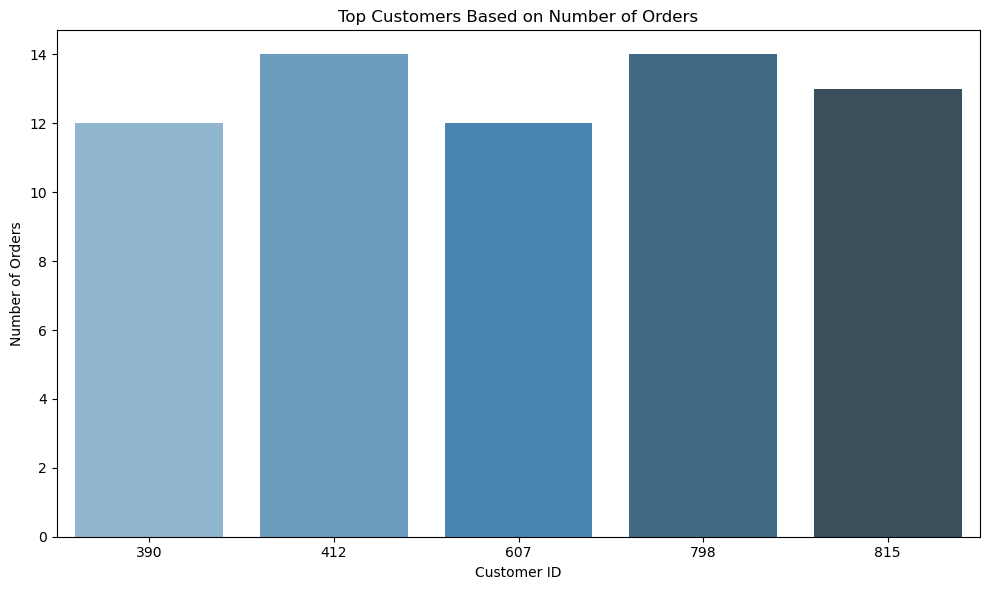

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_id', y='number_of_orders', data=top_customers, palette='Blues_d')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Top Customers Based on Number of Orders')
plt.tight_layout()
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#ff3f3f;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
📌 Unfortunately, the time limitation has been quite short for me. I hope I've been successful in showcasing a portion of my knowledge up to this point. This task was assigned to me on Monday, and the deadline for submission was Thursday morning. Therefore, I only had the evenings of Monday and Tuesday to work on it. Additionally, on Wednesday evening, I had my second interview at the Digikala office. As a result, I had only about 5-6 hours to prepare this answer files. Due to the time constraints, I decided to export the dataset to CSV so that I can import it into Power BI to continue the analysis. I believe that some parts of the task are better suited for demonstration in Power BI, as continuing in Python would have required more time:
</p>
</div>

<center><span style="color: #ff71ce; font-family: cursive; font-size: 28px;" >6. Exporting to csv files 📂 ✈</span></center>

In [31]:
output_directory = r"C:\KOUROSH\Digikala\CSV"
dataframes = {
    "customers": customers,
    "orders": orders,
    "products": products,
    "transactions": transactions
}
for table_name, table in dataframes.items():
    CSV_file_path = os.path.join(output_directory, f"{table_name}.csv")
    table.to_csv(CSV_file_path, index=False)

print(f"Data has been exported to {output_directory}")

<center><span style="color: #ff71ce; font-family: cursive; font-size: 28px;" >7. Exporting to a PostgreSQL database 💻✈</span></center>

<div class="alert alert-block alert-info" style="font-size:20px;"> 📌 I only wrote the code for a single table due to the time constraints, but all of them are the same.</div>

In [32]:
pip install psycopg2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
import psycopg2
print("psycopg2 successfully imported!")

psycopg2 successfully imported!


In [34]:
# Connect to the PostgreSQL database
try:
    conn = psycopg2.connect(
        host = 'localhost',
        dbname = 'digikala',
        user = 'postgres',
        password = 'admin',
        port = 5432
    )
    print("Connected to database successfully!")

    # Create a cursor
    cur = conn.cursor()

    # create products table
    creata_Script = '''
    CREATE TABLE IF NOT EXISTS products (
        product_id PRIMARY KEY,
        product_name VARCHAR(100),
        product_price FLOAT
    )
    '''
    cur.execute(creata_Script)

    # Iterate through the dataset and insert each row into the table

    for index, row in products.iterrows():
        insert_query = """
        INSERT INTO imdb_table (
            product_id, product_name, product_price
            )
        VALUES (
        %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
        );
        """
        cur.execute(insert_query, (
            row["product_id"],
            row["product_name"],
            row["product_price"]
            ))    
    # Execute SQL queries
    rows = cur.fetchall()

        
    #commit the queris
    conn.commit()
    
    # Close the cursor and connection
    cur.close()
    conn.close()
    print("Connection closed.")

except psycopg2.Error as e:
    print("Error:", e)


Error: connection to server at "localhost" (::1), port 5432 failed: FATAL:  database "digikala" does not exist

